In [4]:
!pip install keras
!pip install sklearn

     |████████████████████████████████| 24.9 MB 16.5 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=1ffc92d552eef1b72521d68b8ad70a4370d333084302af12de0e5c773a6b3030
  Stored in directory: /tmp/pip-ephem-wheel-cache-ramoyh5z/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [5]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [6]:
STOPWORDS = set(stopwords.words('english'))

vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [7]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [8]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
label_encoder = LabelEncoder()

train_labels = labels[0: train_size]
train_labels = label_encoder.fit_transform(np.array(train_labels))
train_labels = to_categorical(train_labels)

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]
validation_labels = label_encoder.fit_transform(np.array(validation_labels))

validation_labels = to_categorical(validation_labels)

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index


dict(list(word_index.items())[0:10])

1780
1780
1780
445
445


{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

In [14]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

print(train_sequences[10])

train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

print(train_sequences[10])

print(train_padded[10])

print(train_sequences[0])

print(train_padded[0])

validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

print(set(labels))



#label_tokenizer = Tokenizer()
#label_tokenizer.fit_on_texts(labels)

#training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
#validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

#print(training_label_seq[0])
#print(training_label_seq[1])
#print(training_label_seq[2])
#print(training_label_seq.shape)

#print(validation_label_seq[0])
#print(validation_label_seq[1])
#print(validation_label_seq[2])
#print(validation_label_seq.shape)

#{'tech', 'entertainment', 'business', 'sport', 'politics'}


[2432, 1, 225, 4994, 22, 641, 586, 225, 4994, 1, 1, 1662, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2308, 1, 1144, 1693, 1, 1720, 4995, 1, 1, 1, 1, 1, 4737, 1, 1, 122, 4514, 1, 2, 2875, 1505, 352, 4738, 1, 52, 341, 1, 352, 2172, 3961, 41, 22, 3793, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4739, 1, 365, 22, 1, 787, 2368, 1, 4301, 138, 10, 1, 3664, 682, 3531, 1, 22, 1, 414, 823, 662, 1, 90, 13, 633, 1, 225, 4994, 1, 599, 1, 1693, 1021, 1, 4996, 808, 1864, 117, 1, 1, 1, 2975, 22, 1, 99, 278, 1, 1606, 4997, 542, 492, 1, 1444, 4740, 779, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 478, 564, 301, 1506, 22, 479, 1, 1, 1665, 1, 797, 1, 3067, 1, 1364, 6, 1, 2432, 564, 22, 2972, 4734, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1506, 1342, 374, 20, 63, 883, 1096, 4302, 247]
426
200
192
200
186
200
[2432, 1, 225, 4994, 22, 641, 586, 225, 4994, 1, 1, 1662, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 823, 662, 2308, 1, 1144, 169

In [15]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

In [16]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    #    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(5, activation='softmax')
])
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 394,629
Trainable params: 394,629
Non-trainable params: 0
_________________________________________________________________


In [17]:

num_epochs = 3
history = model.fit(train_padded, train_labels, epochs=num_epochs,
                    validation_data=(validation_padded, validation_labels), verbose=2)


model.save('articleclassif.h5')

Epoch 1/3
56/56 - 8s - loss: 1.4570 - accuracy: 0.3522 - val_loss: 1.0688 - val_accuracy: 0.5596
Epoch 2/3
56/56 - 5s - loss: 0.6596 - accuracy: 0.8067 - val_loss: 0.3924 - val_accuracy: 0.8472
Epoch 3/3
56/56 - 5s - loss: 0.2842 - accuracy: 0.9028 - val_loss: 0.3672 - val_accuracy: 0.8629


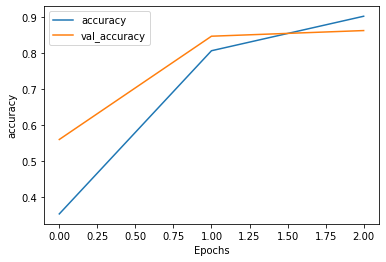

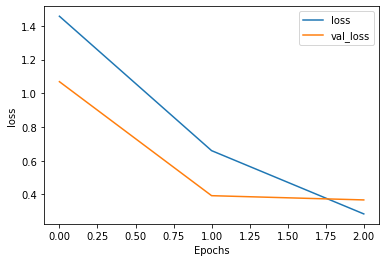

In [18]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
#label_mapping = label_tokenizer.index_word

#txt = [
#    "A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
txt = ["The Republicans and Democrats are together on the senate vote"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)

a = np.argmax(pred)

model_labels = label_encoder.classes_

#print(a)
print(pred, model_labels[np.argmax(pred)])

[[0.03917184 0.00544926 0.03968498 0.9009444  0.01474949]] sport
